In [56]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [57]:
df = pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


#### (1) Outlier detection and removal using Standard Deviation

In [58]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<Axes: xlabel='height', ylabel='Count'>

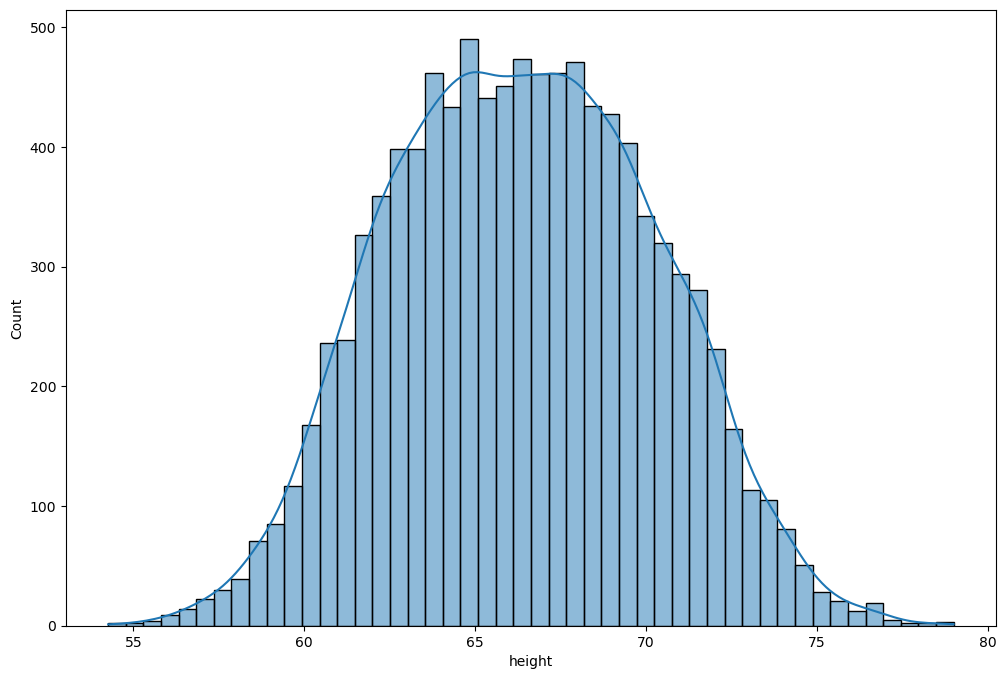

In [59]:
sns.histplot(df.height, kde=True)

In [60]:
mean = df['height'].mean()
mean

66.367559754866

In [61]:
std_dev = df['height'].std()
std_dev

3.847528120795573

In [62]:
#removing outliers from data set
mean - 3 * std_dev

54.824975392479274

In [63]:
mean + 3 * std_dev

77.91014411725271

In [64]:
#finding outliers
mask = (df['height'] < 54.82) | (df['height'] > 77.91)
df[mask]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [65]:
#removing outlier
mask = (df['height'] > 54.82) & (df['height'] < 77.91)
df[mask].shape

(9993, 2)

#### (2) Outlier detection and removal using Z Score

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score:
    Z = (x - mu)/sigma


In [66]:
df['zscore'] = (df.height - df.height.mean())/df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [67]:
df.height.mean()

66.367559754866

In [68]:
df.height.std()

3.847528120795573

In [69]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [70]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


## Exercise

In [85]:
data = pd.read_csv('bhp.csv')
data.shape

(13200, 7)

In [72]:
data['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

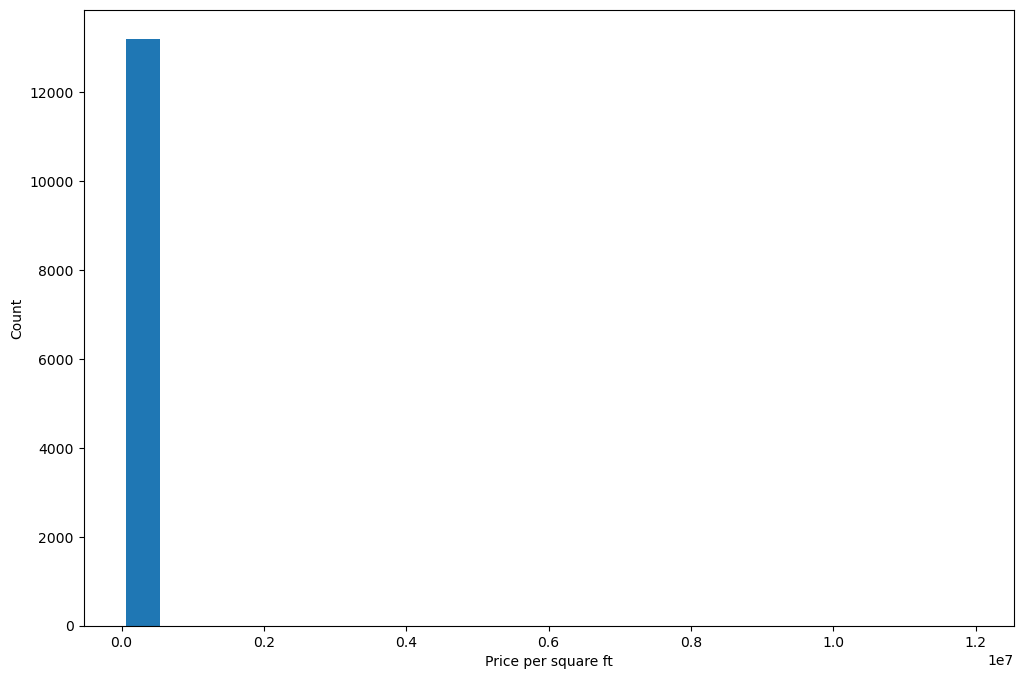

In [74]:
plt.hist(data.price_per_sqft,bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

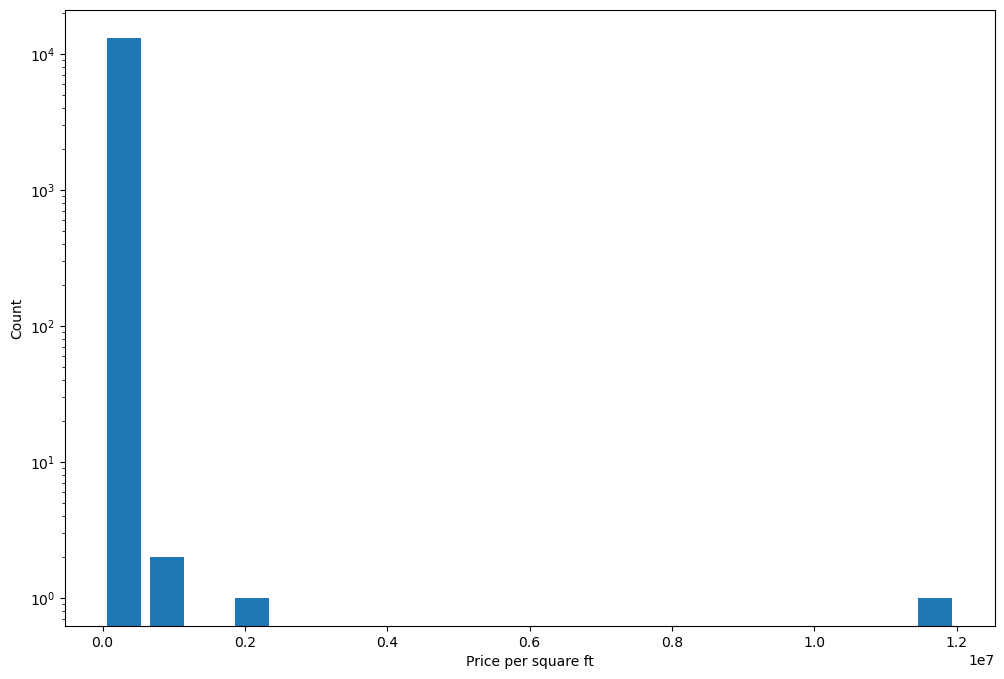

In [75]:
plt.hist(data.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

#### (1) Treat outliers using percentile first

In [78]:
mini, maxi = data.price_per_sqft.quantile([0.001, 0.999])

In [82]:
#finding outliers
mask = (data.price_per_sqft < mini) | (data.price_per_sqft > maxi)
data[mask].shape

(28, 7)

In [89]:
#removing outliers
mask = (data.price_per_sqft > mini) & (data.price_per_sqft < maxi)
df2 = data[mask]

In [90]:
df2.shape

(13172, 7)

#### (2) Now remove outliers using 4 standard deviation

In [92]:
mean1 = df2.price_per_sqft.mean()

In [95]:
std1 = df2.price_per_sqft.std()

In [102]:
lower = mean1 - 4 * std1
upper = mean1 + 4 * std1
lower, upper

(-9900.429065502549, 23227.73653589429)

In [108]:
# finding outliers
mask = (df2.price_per_sqft < lower) | (df2.price_per_sqft > upper)
df2[mask].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
4638,Munnekollal,43 Bedroom,2400.00,40.0,660.0,43,27500
3752,other,4 Bedroom,1200.00,4.0,300.0,4,25000
849,other,4 Bedroom,2400.00,4.0,640.0,4,26666
7908,HAL 2nd Stage,7 Bedroom,1000.00,7.0,250.0,7,25000
12631,Rajaji Nagar,5 Bedroom,2500.00,4.0,650.0,5,26000
5639,other,3 BHK,2777.29,5.0,650.0,3,23404
12948,other,10 Bedroom,7150.00,13.0,3600.0,10,50349
6524,other,3 Bedroom,700.00,3.0,195.0,3,27857
9636,other,4 Bedroom,2100.00,3.0,1000.0,4,47619
2632,other,4 Bedroom,2400.00,4.0,700.0,4,29166


In [109]:
## removing outliers
df3 = df2[(df2.price_per_sqft>lower) & (df2.price_per_sqft<upper)]
df3.shape

(13047, 7)

In [110]:
df2.shape[0]-df3.shape[0]

125

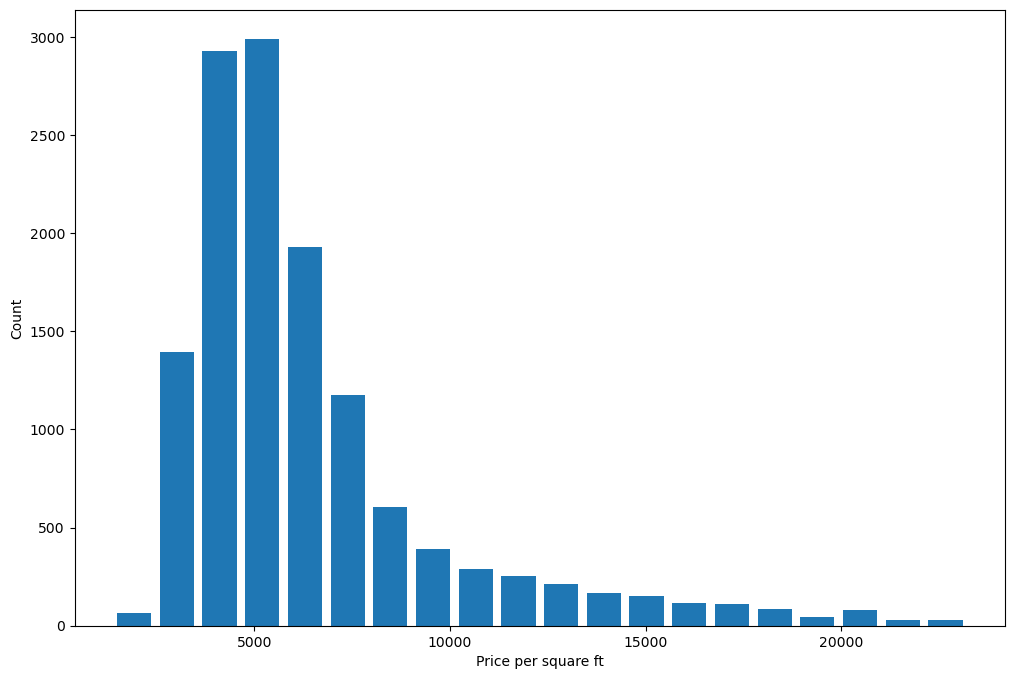

In [111]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

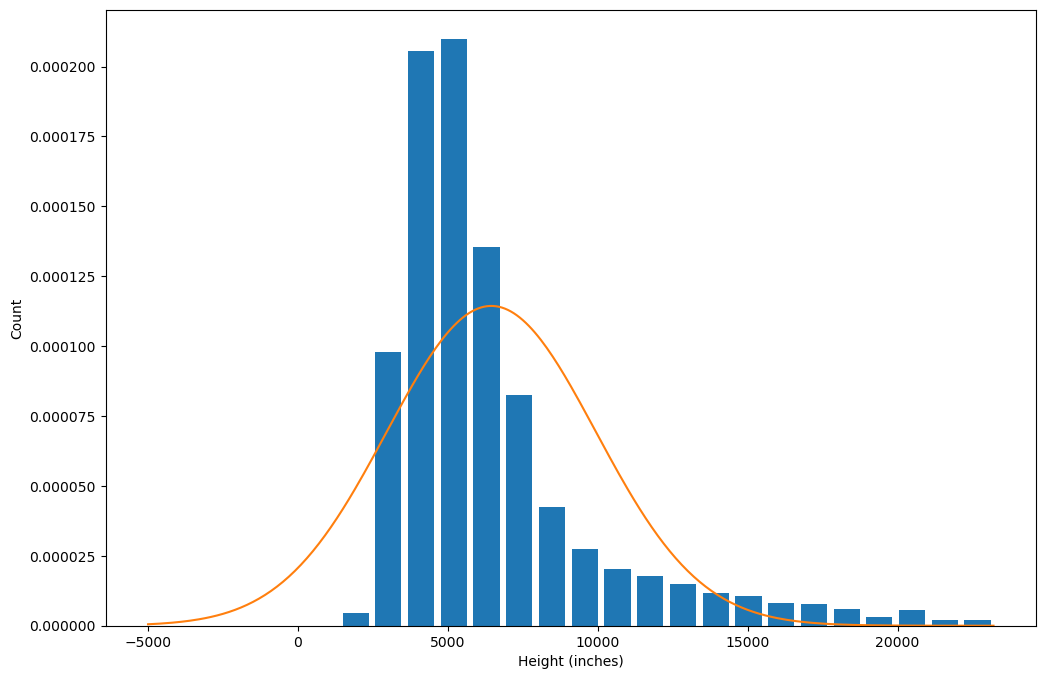

In [112]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

#### (3) Now remove outliers using z score. Use z score of 4 as your thresold

In [113]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\its_y\AppData\Local\Temp\ipykernel_25096\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
2939,other,2 BHK,799.0,2.0,38.0,2,4755,-0.460914
12123,other,4 Bedroom,600.0,3.0,95.0,4,15833,2.214272
10133,Rachenahalli,2 BHK,1050.0,2.0,52.5,2,5000,-0.401750
2920,other,2 BHK,960.0,2.0,32.0,2,3333,-0.804307
6711,other,2 BHK,1200.0,2.0,43.0,2,3583,-0.743936
7803,Prithvi Layout,3 Bedroom,2273.0,4.0,192.0,3,8446,0.430412
4080,Thanisandra,3 BHK,1430.0,2.0,51.6,3,3608,-0.737899
6466,Mysore Road,12 Bedroom,2232.0,6.0,300.0,12,13440,1.636395
5103,R.T. Nagar,3 Bedroom,1140.0,3.0,130.0,3,11403,1.144487
7002,Electronic City,2 BHK,1200.0,2.0,34.0,2,2833,-0.925051


In [114]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [115]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)